In [291]:
import pandas as pd
import numpy as np

import statsmodels.api as stats
import matplotlib as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score, accuracy_score




plt.style.use('ggplot')
import warnings

ModuleNotFoundError: No module named 'roc_curve'

https://github.com/GalvanizeDataScience/solns_jerboa/blob/master/week/Logistic_Regression/solution.md

https://github.com/mrdtirado/logistic-regression/blob/master/assignment.md

## Part 2: Data Exploration: Graduate School Admissions

In [157]:
df = pd.read_csv('/home/asus/G_school_lectures/Week_5_Lectures/logistic-regression/data/grad.csv')

In [158]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [159]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [160]:
pd.crosstab(df['admit'],df['rank'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


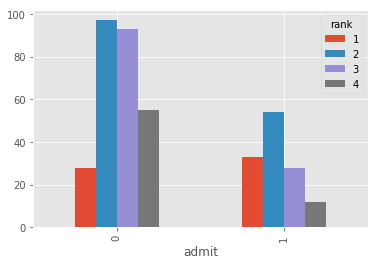

In [161]:
_ = (pd.crosstab(df['admit'],df['rank'])).plot(kind='bar')

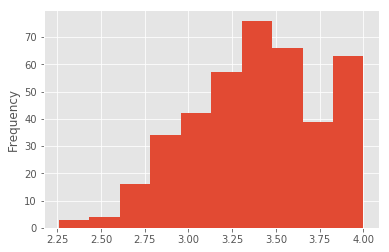

In [162]:
_= df['gpa'].plot(kind='hist')

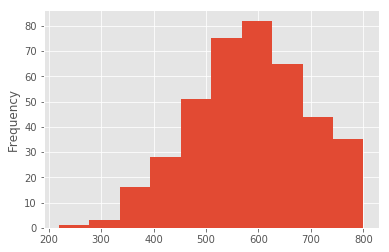

In [163]:
_ = df['gre'].plot(kind='hist')

In [164]:
print('Percentage of students not admitted is {}'.format(len(df[df['admit'] == 0]) / len(df) * 100))

Percentage of students not admitted is 68.25


In [165]:
print('Percentage of students admitted is {}'.format(len(df[df['admit'] == 1]) / len(df) * 100))

Percentage of students admitted is 31.75


## Part 3: Predicting Graduate School Admissions

In [167]:
logit_model = Logit(df['admit'], df[['gre','gpa','rank']])

In [168]:
logit_model = stats.Logit(df['admit'], df[['gre','gpa','rank']])

In [169]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


In [171]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Thu, 06 Jun 2019   Pseudo R-squ.:                 0.06176
Time:                        16:54:40   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 1.971e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155      -0.001       0.004
gpa           -0.0042      0.201     -0.021      0.983      -0.398       0.390
rank          -0.6695      0.121     -5.527      0.0

In [222]:
X = df[['gre','gpa','rank']].values
y = df['admit'].values

In [173]:
# Lets scale our model 
scaler = MinMaxScaler(feature_range=(0,1))
X =scaler.fit_transform(X)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [174]:
model_scaled = stats.Logit(y,X)
result_scaled = model_scaled.fit()

Optimization terminated successfully.
         Current function value: 0.590053
         Iterations 5


In [175]:
print(result_scaled.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Thu, 06 Jun 2019   Pseudo R-squ.:                 0.05587
Time:                        16:54:50   Log-Likelihood:                -236.02
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.594e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0491      0.502      0.098      0.922      -0.936       1.034
x2             0.4525      0.496      0.913      0.361      -0.519       1.424
x3            -2.1934      0.351     -6.252      0.0

At 0.05 level of signifance we can't say that gre or gpa contribute signifcantly to if someone will get admitted to a program. The rank of the school is a signifcant contributer. 

In [138]:
# Switching to Sklearn
clf = LogisticRegression()

In [143]:
result_scaled = clf.fit(X,y)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [140]:
# Error metric computed r2 score
clf.score(X,y)

0.7075

In [141]:
# Predicted Probablity that someone is admitted 
clf.predict_proba(X)[:,1]

array([0.21755537, 0.30740433, 0.65105788, 0.16382234, 0.12321335,
       0.37338519, 0.42012236, 0.26296829, 0.23942659, 0.47677908,
       0.28368506, 0.40777504, 0.63684668, 0.36223369, 0.61508094,
       0.22781857, 0.26300454, 0.12989597, 0.4915881 , 0.52842896,
       0.20724293, 0.42112807, 0.13007743, 0.17249172, 0.42049301,
       0.60643436, 0.53127431, 0.18145841, 0.41025377, 0.44774173,
       0.18954147, 0.30208285, 0.25784203, 0.3990066 , 0.36768285,
       0.25970916, 0.46522442, 0.18807298, 0.29996029, 0.16989225,
       0.23974557, 0.35055918, 0.33598019, 0.22048599, 0.34423656,
       0.22338698, 0.36870101, 0.12229981, 0.08789815, 0.19856344,
       0.32380296, 0.12198469, 0.20200867, 0.37995263, 0.26933511,
       0.37693243, 0.22489121, 0.16016113, 0.32963969, 0.13007743,
       0.34674404, 0.15697964, 0.3008451 , 0.33626388, 0.32070284,
       0.39325787, 0.22564051, 0.48770253, 0.52704712, 0.61579621,
       0.34128778, 0.09038757, 0.14610808, 0.4417915 , 0.20427

In [230]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [252]:
#Kfold cross validation of a dataset

warnings.filterwarnings('ignore')
accuracies = []
precisions = []
recalls = []

kfold = KFold(len(y))

for train_index, test_index in kfold.split(X):
    # fit my model on training index of X, y
    model = LogisticRegression()
    model.fit(X[train_index], y[train_index])
    
    # predict model on test index using X
    y_predict = model.predict(X[test_index])
    
    # grab true values of y of the test_index
    y_true = y[test_index]    
    
    #Scores created by using true and predicted values
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

In [254]:
print ("accuracy:", np.mean(accuracies))
print ("precision:", np.mean(precisions))
print ("recall:", np.mean(recalls))
    

accuracy: 0.695
precision: 0.0575
recall: 0.0575


In [286]:
# Rank is categorical, we should do a one hot encoding for our rank variable
dummies = pd.get_dummies(df['rank'], prefix='rank')
X2 = df[['gre','gpa']].join(dummies).values

In [290]:
# compute kfold again using dummy rank

warnings.filterwarnings('ignore')
accuracies = []
precisions = []
recalls = []

kfold = KFold(len(y))

for train_index, test_index in kfold.split(X2):
    # fit my model on training index of X, y
    model = LogisticRegression()
    model.fit(X2[train_index], y[train_index])
    # predict model on test index using X
    y_predict = model.predict(X2[test_index])
    
    # grab true values of y of the test_index
    y_true = y[test_index]    
    
    #Scores created by using true and predicted values
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))
    
print ("accuracy:", np.mean(accuracies))
print ("precision:", np.mean(precisions))
print ("recall:", np.mean(recalls))

accuracy: 0.6975
precision: 0.06
recall: 0.06
